In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pip install -U scikit-learn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [51]:
# load dataset
data = pd.read_csv("data/biopics.csv", sep=",", encoding="latin-1")
data.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               761 non-null    object
 1   site                761 non-null    object
 2   country             761 non-null    object
 3   year_release        761 non-null    int64 
 4   box_office          761 non-null    object
 5   director            761 non-null    object
 6   number_of_subjects  761 non-null    int64 
 7   subject             761 non-null    object
 8   type_of_subject     761 non-null    object
 9   race_known          761 non-null    object
 10  subject_race        564 non-null    object
 11  person_of_color     761 non-null    int64 
 12  subject_sex         761 non-null    object
 13  lead_actor_actress  754 non-null    object
dtypes: int64(3), object(11)
memory usage: 83.4+ KB


In [24]:
data.isna().sum()

title                   0
site                    0
country                 0
year_release            0
box_office              0
director                0
number_of_subjects      0
subject                 0
type_of_subject         0
race_known              0
subject_race          197
person_of_color         0
subject_sex             0
lead_actor_actress      7
dtype: int64

In [25]:
data.isnull().sum()

title                   0
site                    0
country                 0
year_release            0
box_office              0
director                0
number_of_subjects      0
subject                 0
type_of_subject         0
race_known              0
subject_race          197
person_of_color         0
subject_sex             0
lead_actor_actress      7
dtype: int64

In [32]:
data["country"].unique()

array(['UK', 'US/UK', 'Canada', 'US', 'Canada/UK', 'US/Canada',
       'US/UK/Canada'], dtype=object)

In [52]:
data["country"] = data["country"].str.split('/', expand=False)

In [57]:
new_data = data.explode('country')

In [59]:
new_data.country.unique()

array(['UK', 'US', 'Canada'], dtype=object)

In [61]:
new_data["year_release"].unique()

array([1971, 2013, 2010, 2014, 1998, 2008, 2002, 1994, 1987, 2001, 2011,
       1993, 1955, 1966, 2007, 1945, 1940, 1952, 1930, 2004, 1959, 1956,
       2006, 1984, 2009, 1992, 2003, 1990, 1946, 1950, 1935, 1961, 1996,
       1957, 1954, 1964, 2000, 1997, 1941, 1988, 1962, 1989, 1967, 1976,
       1999, 1938, 1995, 1972, 1944, 1991, 1969, 1975, 2005, 1986, 1958,
       2012, 1970, 1934, 1963, 1980, 1983, 1985, 1973, 1929, 1981, 1979,
       1982, 1968, 1942, 1977, 1965, 1960, 1953, 1951, 1939, 1948, 1974,
       1943, 1936, 1978, 1933, 1915, 1927, 1937, 1947, 1949], dtype=int64)

In [60]:
data["box_office"].apply(lambda x: x[-1]).unique()

array(['-', 'M', 'K'], dtype=object)

In [62]:
def convert_box_office(value):
    if value[-1] == 'M':
        return float(value[1:-1]) * 1e6
    elif value[-1] == 'K':
        return float(value[1:-1]) * 1e3
    else:
        return np.nan
    
data["box_office"] = data["box_office"].apply(convert_box_office)

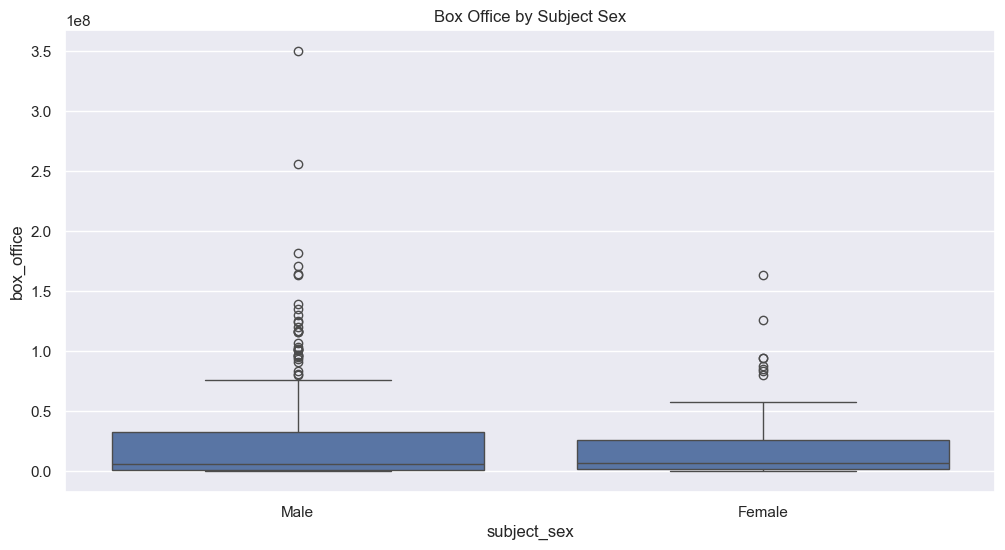

In [71]:
# Visualizations
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x="subject_sex", y="box_office", data=data)
plt.title("Box Office by Subject Sex")
plt.show()

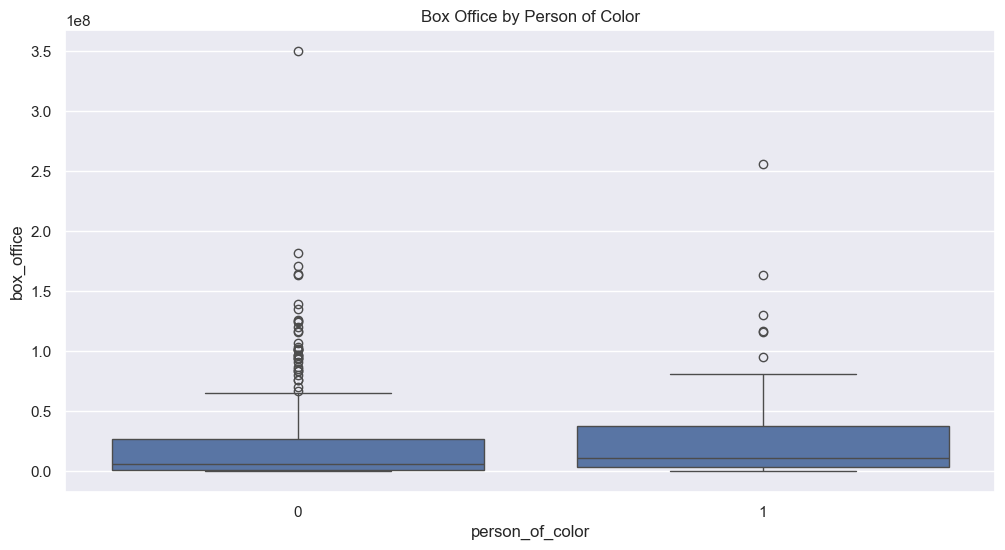

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="person_of_color", y="box_office", data=data)
plt.title("Box Office by Person of Color")
plt.show()

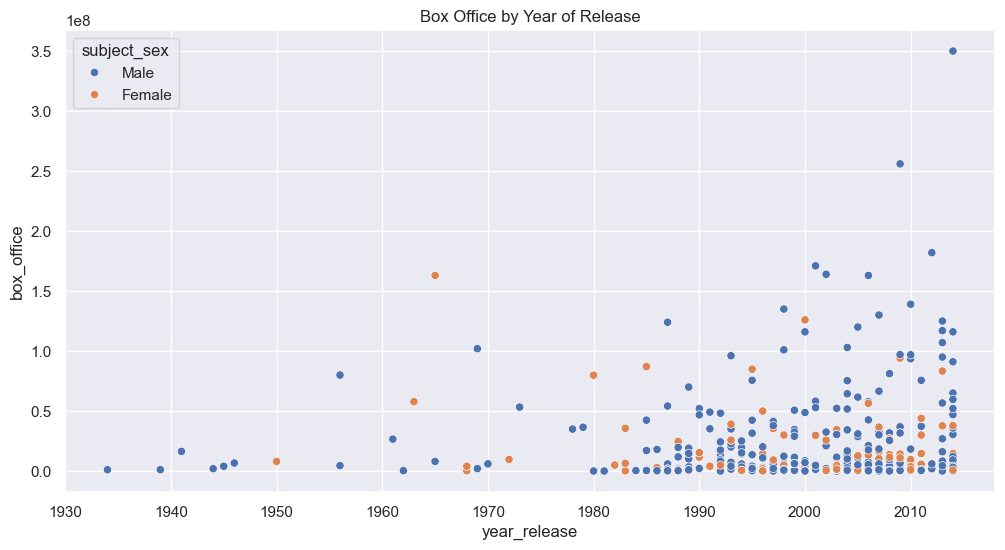

In [72]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x="year_release", y="box_office", hue="subject_sex", data=data)
plt.title("Box Office by Year of Release")
plt.show()

In [63]:
new_data["number_of_subjects"].unique()

array([1, 2, 3, 4], dtype=int64)

In [64]:
new_data["type_of_subject"].unique()

array(['Criminal', 'Other', 'Athlete', 'Musician', 'Author', 'Academic',
       'Historical', 'Actress ', 'Journalist', 'World leader', 'Military',
       'Comedian', 'Actor', 'Medicine', 'Artist', 'Activist',
       'Politician', 'Military / activist', 'Singer', 'Author (poet)',
       'Actress', 'Teacher', 'Government', 'Actress / activist', 'Media',
       'Athlete / military', 'Academic (Philosopher)'], dtype=object)

In [79]:
# One-hot encoding for categorical columns
data = pd.get_dummies(data, columns=["subject_sex", "person_of_color", "race_known"], drop_first=True)
data

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,subject_race,lead_actor_actress,subject_sex_Male,person_of_color_1,race_known_Unknown
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,[UK],1971,NaN,Richard Fleischer,1,John Christie,Criminal,NaN,Richard Attenborough,True,False,True
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,"[US, UK]",2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,African American,Chiwetel Ejiofor,True,True,False
2,127 Hours,http://www.imdb.com/title/tt1542344/,"[US, UK]",2010,18300000.0,Danny Boyle,1,Aron Ralston,Athlete,NaN,James Franco,True,False,True
3,1987,http://www.imdb.com/title/tt2833074/,[Canada],2014,NaN,Ricardo Trogi,1,Ricardo Trogi,Other,White,Jean-Carl Boucher,True,False,False
4,20 Dates,http://www.imdb.com/title/tt0138987/,[US],1998,537000.0,Myles Berkowitz,1,Myles Berkowitz,Other,NaN,Myles Berkowitz,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Young Man with a Horn,http://www.imdb.com/title/tt0043153/,[US],1950,NaN,Michael Curtiz,1,Bix Beiderbecke,Musician,White,Kirk Douglas,True,False,False
757,Young Mr. Lincoln,http://www.imdb.com/title/tt0032155/,[US],1939,NaN,John Ford,1,Abraham Lincoln,World leader,White,Henry Fonda,True,False,False
758,Young Tom Edison,http://www.imdb.com/title/tt0033289/,[US],1940,NaN,Norman Taurog,1,Thomas Edison,Other,White,Mickey Rooney,True,False,False
759,Young Winston,http://www.imdb.com/title/tt0069528/,[US],1972,NaN,Richard Attenborough,1,Winston Churchill,World leader,White,Simon Ward,True,False,False


In [90]:
data["box_office"] = data["box_office"].fillna(data["box_office"].mean())

In [91]:
# Split the dataset into train and test sets
X = data.drop(['title', 'site', 'box_office', 'country', 'director', 
               'subject', 'type_of_subject', 'lead_actor_actress', 'subject_race'], axis=1)
y = data['box_office']

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year_release        761 non-null    int64
 1   number_of_subjects  761 non-null    int64
 2   subject_sex_Male    761 non-null    bool 
 3   person_of_color_1   761 non-null    bool 
 4   race_known_Unknown  761 non-null    bool 
dtypes: bool(3), int64(2)
memory usage: 14.2 KB


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
y_train

519    4.470000e+06
83     2.298117e+07
61     2.298117e+07
423    2.298117e+07
465    3.090000e+06
           ...     
71     1.450000e+07
106    2.298117e+07
270    2.298117e+07
435    2.298117e+07
102    8.130000e+06
Name: box_office, Length: 532, dtype: float64

In [112]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [113]:
predictions = model.predict(X_test_scaled)

In [114]:
r2_score_linear = r2_score(y_test, predictions)

In [115]:
print(r2_score_linear)

0.001755613249246335
